ID3(Stands for Iterative Dichotomiser 3) Decision Tree Algorithm 

In [47]:
import pandas as pd
import numpy as np
import pydotplus
from IPython.display import Image, display

In [5]:
data = pd.read_csv(r'LEAD.csv')
data.head()

,OWN_HOUSE,OWN_CAR,HOUSE_LOAN,CAR_LOAN,SMOKER,HEART_DISEASE,DIABETES,MARITAL_STATUS,CHILDREN,OTHER_INSURANCE,PURCHASE
0,1,0,0,0,0,0,1,1,1,1,1
1,0,0,0,0,0,0,1,1,1,0,0
2,0,0,0,0,0,0,1,1,2,0,0
3,0,0,0,0,0,0,0,1,1,0,0
4,1,0,0,0,1,0,0,0,0,1,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20742 entries, 0 to 20741
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   OWN_HOUSE        20742 non-null  int64
 1   OWN_CAR          20742 non-null  int64
 2   HOUSE_LOAN       20742 non-null  int64
 3   CAR_LOAN         20742 non-null  int64
 4   SMOKER           20742 non-null  int64
 5   HEART_DISEASE    20742 non-null  int64
 6   DIABETES         20742 non-null  int64
 7   MARITAL_STATUS   20742 non-null  int64
 8   CHILDREN         20742 non-null  int64
 9   OTHER_INSURANCE  20742 non-null  int64
 10  PURCHASE         20742 non-null  int64
dtypes: int64(11)
memory usage: 1.7 MB


In [7]:
data.describe()

,OWN_HOUSE,OWN_CAR,HOUSE_LOAN,CAR_LOAN,SMOKER,HEART_DISEASE,DIABETES,MARITAL_STATUS,CHILDREN,OTHER_INSURANCE,PURCHASE
count,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000,20742.000000
mean,0.336033,0.166715,0.038521,0.037219,0.229968,0.034664,0.310722,0.955067,1.244673,0.280494,0.085768
std,0.472362,0.372730,0.192455,0.189303,0.420822,0.182932,0.462800,0.207162,0.696347,0.449251,0.280028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000


In [8]:
data.PURCHASE.value_counts(normalize=True)

0    0.914232
1    0.085768
Name: PURCHASE, dtype: float64

Now, we need to check whether there is any missing value in the dataset or not. For that we will be using the following code.

In [9]:
data.isnull().sum(axis = 0)

OWN_HOUSE          0
OWN_CAR            0
HOUSE_LOAN         0
CAR_LOAN           0
SMOKER             0
HEART_DISEASE      0
DIABETES           0
MARITAL_STATUS     0
CHILDREN           0
OTHER_INSURANCE    0
PURCHASE           0
dtype: int64

In [56]:
X_labels = ['OWN_HOUSE', 'OWN_CAR', 'HOUSE_LOAN', 'CAR_LOAN',
                   'SMOKER', 'HEART_DISEASE', 'DIABETES', 'MARITAL_STATUS', 'CHILDREN', 'OTHER_INSURANCE']
X = data[X_labels]
y_labels = ['PURCHASE']
y = np.array(data[y_labels])

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=25)

Now we will be fitting the Decision Tree model on the training dataset for a depth of 3

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [135]:
dectree = DecisionTreeClassifier(max_depth=3)
dectree_train = dectree.fit(X_train, y_train)
y_pred = dectree_train.predict(X_test)

In [136]:
test_pred = pd.DataFrame(np.hstack((X_test,y_test,y_pred.reshape(-1,1))),columns=['OWN_HOUSE', 'OWN_CAR', 'HOUSE_LOAN', 'CAR_LOAN',
                   'SMOKER', 'HEART_DISEASE', 'DIABETES', 'MARITAL_STATUS', 'CHILDREN', 'OTHER_INSURANCE','y_test','y_pred'])
test_pred.head()

,OWN_HOUSE,OWN_CAR,HOUSE_LOAN,CAR_LOAN,SMOKER,HEART_DISEASE,DIABETES,MARITAL_STATUS,CHILDREN,OTHER_INSURANCE,y_test,y_pred
0,0,0,0,0,0,0,0,1,2,1,0,0
1,0,0,0,0,0,0,1,1,2,0,0,0
2,0,0,0,0,0,0,0,1,2,0,0,0
3,1,0,0,0,0,0,0,1,1,0,0,0
4,1,0,0,0,0,0,1,1,1,1,0,0


In [137]:
test_pred[['y_test','y_pred']].head(20)

,y_test,y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [138]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Decision tree accuracy Score=",accuracy_score(y_test,y_pred)*100)

Decision tree accuracy Score= 91.58097686375322


In [139]:
prob = dectree_train.predict_proba(X_test)
prob

array([[0.92105263, 0.07894737],
       [0.98386754, 0.01613246],
       [0.98386754, 0.01613246],
       ...,
       [1.        , 0.        ],
       [0.92105263, 0.07894737],
       [0.98386754, 0.01613246]])

Suppose we get a new observation of a customer who does not:
1. own a house
2. have a heart disease
3. have any other insurance

and the customer has:
1. car
2. house loan
3. car loan
4. smoker
5. diabetes
6. married
7. one children

In [140]:
sample_df = pd.DataFrame([[0,1,1,1,1,0,1,1,1,0]],columns = ['OWN_HOUSE', 'OWN_CAR', 'HOUSE_LOAN', 'CAR_LOAN',
                   'SMOKER', 'HEART_DISEASE', 'DIABETES', 'MARITAL_STATUS', 'CHILDREN', 'OTHER_INSURANCE'])
sample_df

,OWN_HOUSE,OWN_CAR,HOUSE_LOAN,CAR_LOAN,SMOKER,HEART_DISEASE,DIABETES,MARITAL_STATUS,CHILDREN,OTHER_INSURANCE
0,0,1,1,1,1,0,1,1,1,0


In [141]:
dectree_train.predict(sample_df)

array([0])

for this customer, he is not going to purchase the item

In [142]:
dectree_train.predict_proba(sample_df)

array([[0.98386754, 0.01613246]])

The probability of making this claim is 98%

In [143]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[2846    5]
 [ 257    4]]


In [144]:
#Actually 0, but predicted as 0: TN
TN = cm[0,0]
print("True Negative: ",TN)

True Negative:  2846


In [145]:
#Actually 0, but predicted as 1 : FP
FP = cm[0,1]
print("False Positive: ",FP)

False Positive:  5


In [146]:
#Actually 1, but predicted as 0 : FN
FN = cm[1,0]
print("False Negative: ",FN)

False Negative:  257


In [147]:
#Actually 1, but predicted as 1 : TP
TP = cm[1,1]
print("True Positive: ",TP)

True Positive:  4


In [148]:
#Accuracy = Total Number of correct predictions/Total Number of observations
#orAccuracy = (TN+TP)/Total Number of observations
n=len(y_test)
(TN+TP)/n

0.9158097686375322

In [149]:
# recall orTPR or Sensitivity : TP/(TP+FN)
recall = TP/(TP+FN)
recall

0.01532567049808429

In [150]:
#Specificity : TN/(TN+FP)
specificity = TN/(TN+FP)
specificity

0.9982462293931954

In [151]:
#FPR = 1-specificity or FP/(FP+TN)
FPR = 1-specificity
FPR

0.0017537706068045944

In [152]:
precision = TP/(TP+FP)
precision

0.4444444444444444

In [153]:
from sklearn.metrics import f1_score,roc_curve,auc

In [154]:
f1_score(y_test,y_pred)

0.029629629629629627

In [155]:
(2*precision*recall)/(precision+recall)

0.029629629629629627

In [156]:
prob

array([[0.92105263, 0.07894737],
       [0.98386754, 0.01613246],
       [0.98386754, 0.01613246],
       ...,
       [1.        , 0.        ],
       [0.92105263, 0.07894737],
       [0.98386754, 0.01613246]])

In [157]:
prob_positive = prob[:,1]

In [158]:
fpr, tpr, threshold = roc_curve(y_test,prob_positive)

In [159]:
ftt = pd.DataFrame(np.hstack((threshold.reshape(-1,1),fpr.reshape(-1,1),tpr.reshape(-1,1))),columns = ['threshold','fpr','tpr'])
ftt.head()

,threshold,fpr,tpr
0,1.515625,0.000000,0.000000
1,0.515625,0.001754,0.015326
2,0.267613,0.184497,0.689655
3,0.105995,0.243774,0.747126
4,0.078947,0.358471,0.854406


In [160]:
roc_auc = auc(fpr,tpr)
roc_auc

0.8067082733624419

In [161]:
def compute_auc(test, train_instance):
    probs = train_instance.predict_proba(test)
    prob_positive = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test,prob_positive)
    roc_auc = auc(fpr,tpr)
    return roc_auc,fpr,tpr

In [162]:
roc_auc, fpr, tpr = compute_auc(X_test,dectree_train)
roc_auc

0.8067082733624419

In [163]:
import matplotlib.pyplot as plt

In [164]:
def plot_ROC(roc,fpr,tpr):
    plt.title("receiver Operating Charecteristc")
    plt.plot(fpr,tpr,'red',label = 'AUC=%0.2f'% roc)
    plt.legend(loc = 'lower right')
    plt.plot([0,1],[0,1], color = 'darkblue',linestyle='--')
    plt.ylabel('True positive Rate')
    plt.xlabel('False positive Rate')
    plt.show()

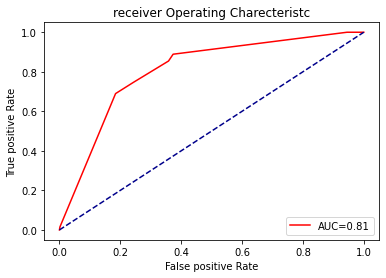

In [165]:
plot_ROC(roc_auc,fpr,tpr)

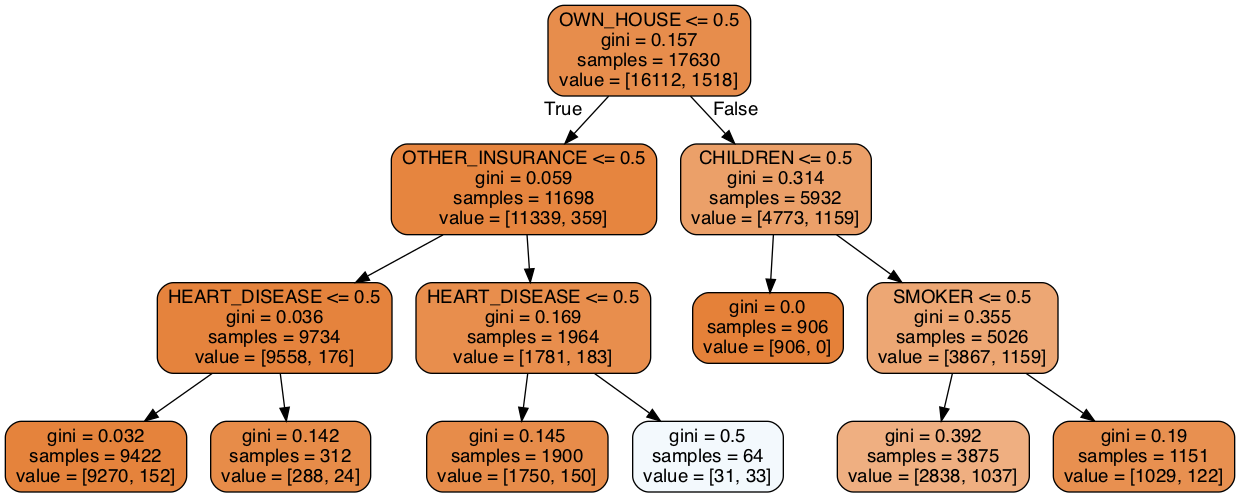

In [166]:
def display_image(clf, X_labels, y_labels):
    """
    Prerequiste: 
        install pydotplus with ->  conda install -c conda-forge pydotplus 
        install graphviz with -> brew install graphviz
        
        
    Installing dependencies for graphviz: 
    libpng, freetype, fontconfig, jpeg, libtiff, webp, gd, pcre, gdbm,
    mpdecimal, sqlite, xz, python@3.9, glib, jasper, netpbm,
    gts, libpthread-stubs, xorgproto, libxau, libxdmcp,
    libxcb, libx11, libxext, libxrender, lzo, pixman, cairo,
    gdk-pixbuf, fribidi, gobject-introspection, graphite2,
    icu4c, harfbuzz, pango and librsvg
    
    
    Displays the decision tree image
 
    :param clf:     classifier instance
    :param X_labels
    :param y_labels
    
    """
    dot_data = export_graphviz(clf, out_file=None,
                                    feature_names=X_labels,
#                                     class_names=iris.target_names,
                                    filled=True, rounded=True)
 
    graph = pydotplus.graph_from_dot_data(dot_data)
    display(Image(data=graph.create_png()))


display_image(clf=dectree_train, X_labels=X_labels, y_labels=y_labels)